# ANÁLISIS DEL DATASET DE VIDEOS  DEL TOP DE 6 EPECIES

In [ ]:
import pandas as pd

# Cargar el archivo Excel en dinde contiene los datos de las imágenes
archivo_excel = '/home/emontenegrob/dataset_frames_conf/top_6_species_split_dataset.xlsx'
df = pd.read_excel(archivo_excel)


In [33]:
from tabulate import tabulate

# Crear la tabla de especie_id y species_name
tabla_especies = df[['species_id', 'species_name']].drop_duplicates().sort_values(by='species_id')

# Mostrar la tabla tabulada
print(tabulate(tabla_especies, headers='keys', tablefmt='psql'))


+------+--------------+-------------------------------------------------------------------------+
|      |   species_id | species_name                                                            |
|------+--------------+-------------------------------------------------------------------------|
|    0 |            1 | AGUTI CENTROAMERICANO, Central American Agouti - Dasyprocta punctata    |
|  484 |            2 | ARDILLAS SCIURIDAE                                                      |
|  678 |            3 | ARMADILLO DE NUEVE BANDAS, Nine-banded Armadillo - Dasypus novemcinctus |
|  853 |            4 | PACA DE TIERRAS BAJAS, Lowland Paca -  Cuniculus paca.                  |
|  987 |            5 | ROEDOR                                                                  |
| 1293 |            6 | TINAMU GRANDE, GREAT TINAMOU, Tinamus major.                            |
+------+--------------+-------------------------------------------------------------------------+


In [34]:
# Agrupar los datos por specie_id y splitdata_pilot
conteo_splitdata = df.groupby(['species_id', 'splitdata_pilot']).size().reset_index(name='conteo')

# Mostrar los primeros resultados para verificar
print(tabulate(conteo_splitdata.head(18), headers='keys', tablefmt='psql'))


+----+--------------+-------------------+----------+
|    |   species_id | splitdata_pilot   |   conteo |
|----+--------------+-------------------+----------|
|  0 |            1 | test              |       20 |
|  1 |            1 | train             |       91 |
|  2 |            1 | validation        |       19 |
|  3 |            2 | test              |       20 |
|  4 |            2 | train             |       91 |
|  5 |            2 | validation        |       19 |
|  6 |            3 | test              |       20 |
|  7 |            3 | train             |       91 |
|  8 |            3 | validation        |       19 |
|  9 |            4 | test              |       20 |
| 10 |            4 | train             |       91 |
| 11 |            4 | validation        |       19 |
| 12 |            5 | test              |       20 |
| 13 |            5 | train             |       91 |
| 14 |            5 | validation        |       19 |
| 15 |            6 | test              |     

In [35]:
# Crear un diccionario con los nombres originales como claves y los nombres personalizados como valores
nombres_personalizados = {
    'AGUTI CENTROAMERICANO, Central American Agouti - Dasyprocta punctata': 'Central American Agouti',
    'ARDILLAS SCIURIDAE': 'Squirrel SCIURIDAE',
    'ARMADILLO DE NUEVE BANDAS, Nine-banded Armadillo - Dasypus novemcinctus': 'Nine-banded Armadillo',
    'PACA DE TIERRAS BAJAS, Lowland Paca - Cuniculus paca.': 'Lowland Paca',
    'ROEDOR': 'Rodent',
    'TINAMU GRANDE, GREAT TINAMOU, Tinamus major.': 'Great Tinamou'
}

class_names = ['Central American Agouti', 'Squirrel SCIURIDAE', 'Nine-banded Armadillo',
               'Lowland Paca', 'Rodent', 'Great Tinamou']

In [36]:
# Mapear los nombres personalizados a la columna species_name
df['species_name_custom'] = df['species_name'].map(nombres_personalizados)

# Hacer el merge de nuevo para incluir los nombres personalizados
conteo_splitdata = conteo_splitdata.merge(df[['species_id', 'species_name_custom']], on='species_id', how='left')


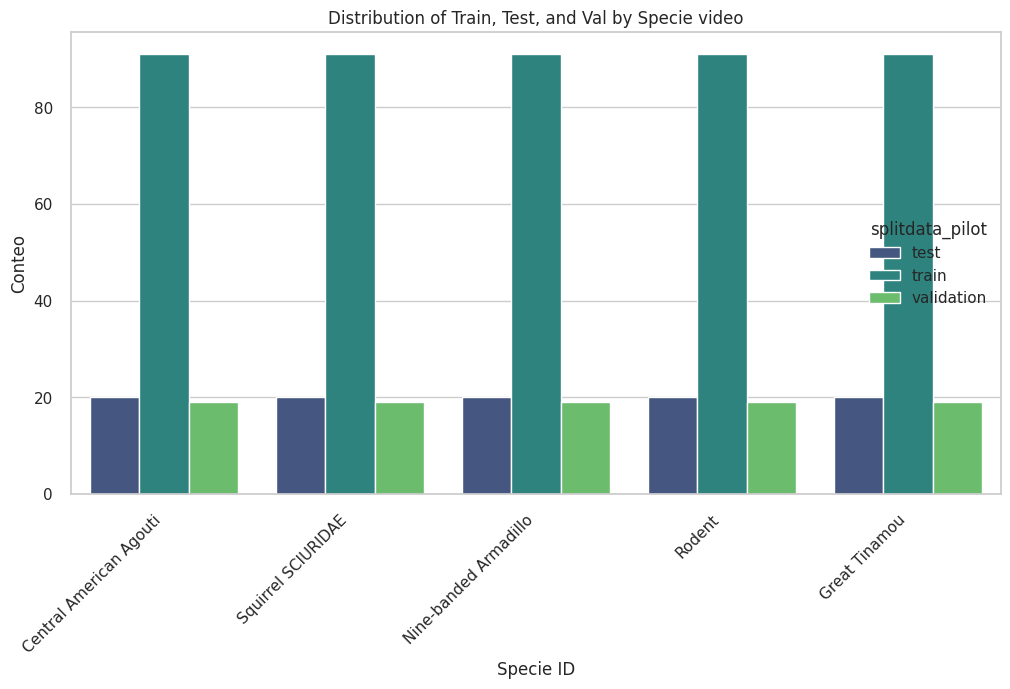

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apilado
plt.figure(figsize=(12, 6))
sns.barplot(x='species_name_custom', y='conteo', hue='splitdata_pilot', data=conteo_splitdata, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribution of Train, Test, and Val by Specie video')
plt.xlabel('Specie ID')
plt.ylabel('Conteo')
# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')
# Mostrar la gráfica
plt.show()


### ANÁLISIS DE FRAMES  INDIVIDUAL PARA LA ESPECIE 0(AGUTI CENTROAMERICANO, Central American Agouti)

In [10]:
import pandas as pd

# Ruta a tu archivo Excel (puedes cambiar esta ruta por la correcta)
excel_path = "/home/emontenegrob/dataset_frames_conf/dataset_frames_1_1.xlsx"

# Cargar el archivo Excel
df = pd.read_excel(excel_path)

# Mostrar los nombres de las columnas
print(df.columns)


Index(['Path del Video',
       'Frame (imagen luego del algoritmo de detección de movimiento)', 'ID',
       'Especie', 'Tipo', 'sha256 (del video)', 'sha256 de la imagen',
       'Partition', 'Bounding Box', 'Confianza'],
      dtype='object')


In [11]:
import pandas as pd

# Cargar el archivo Excel
archivo_excel = '/home/emontenegrob/dataset_frames_conf/dataset_frames_1_1.xlsx'
df1 = pd.read_excel(archivo_excel)

df1.head()

,Path del Video,Frame (imagen luego del algoritmo de detección de movimiento),ID,Especie,Tipo,sha256 (del video),sha256 de la imagen,Partition,Bounding Box,Confianza
0,/home/emontenegrob/OCTUBRE 2020/canande 2 500 ...,/home/emontenegrob/frames_pilot_1_1/frames_tra...,1,"AGUTI CENTROAMERICANO, Central American Agouti...",mamífero,cc61d5c8a771e62fc43a51bec4111df3909be4859231f3...,421685ffd3910cae3e29035b498257c1656f1f9e4a375e...,train,"(57, 160, 212, 317)",0.640783
1,/home/emontenegrob/OCTUBRE 2020/canande 2 500 ...,/home/emontenegrob/frames_pilot_1_1/frames_tra...,1,"AGUTI CENTROAMERICANO, Central American Agouti...",mamífero,cc61d5c8a771e62fc43a51bec4111df3909be4859231f3...,22f2736e01f53baddf68429faadd5e3179eab284c95734...,train,"(57, 160, 212, 321)",0.683241
2,/home/emontenegrob/OCTUBRE 2020/canande 2 500 ...,/home/emontenegrob/frames_pilot_1_1/frames_tra...,1,"AGUTI CENTROAMERICANO, Central American Agouti...",mamífero,cc61d5c8a771e62fc43a51bec4111df3909be4859231f3...,22f2736e01f53baddf68429faadd5e3179eab284c95734...,train,"(57, 160, 212, 321)",0.683241
3,/home/emontenegrob/OCTUBRE 2020/canande 2 500 ...,/home/emontenegrob/frames_pilot_1_1/frames_tra...,1,"AGUTI CENTROAMERICANO, Central American Agouti...",mamífero,cc61d5c8a771e62fc43a51bec4111df3909be4859231f3...,925a7290e1f8978a6e81fc1ef2ae7f59927c38c3c79108...,train,"(57, 156, 211, 320)",0.669633
4,/home/emontenegrob/abr-jun-21/tarjeta 3 gualpi...,/home/emontenegrob/frames_pilot_1_1/frames_tra...,1,"AGUTI CENTROAMERICANO, Central American Agouti...",mamífero,0abd088184e8e2c5967faddae34450ef245ad43fceb37e...,5be5c3785636dfe79fff711770f3c6738e0bc910e443e2...,train,"(214, 366, 554, 668)",0.946035


In [12]:
from tabulate import tabulate

# Agrupar los datos por specie_id y splitdata_pilot
conteo_splitdata = df1.groupby(['ID', 'Partition']).size().reset_index(name='conteo')

# Mostrar los primeros resultados para verificar
print(tabulate(conteo_splitdata.head(18), headers='keys', tablefmt='psql'))

+----+------+-------------+----------+
|    |   ID | Partition   |   conteo |
|----+------+-------------+----------|
|  0 |    1 | test        |     2275 |
|  1 |    1 | train       |    10227 |
|  2 |    1 | validation  |     1069 |
+----+------+-------------+----------+


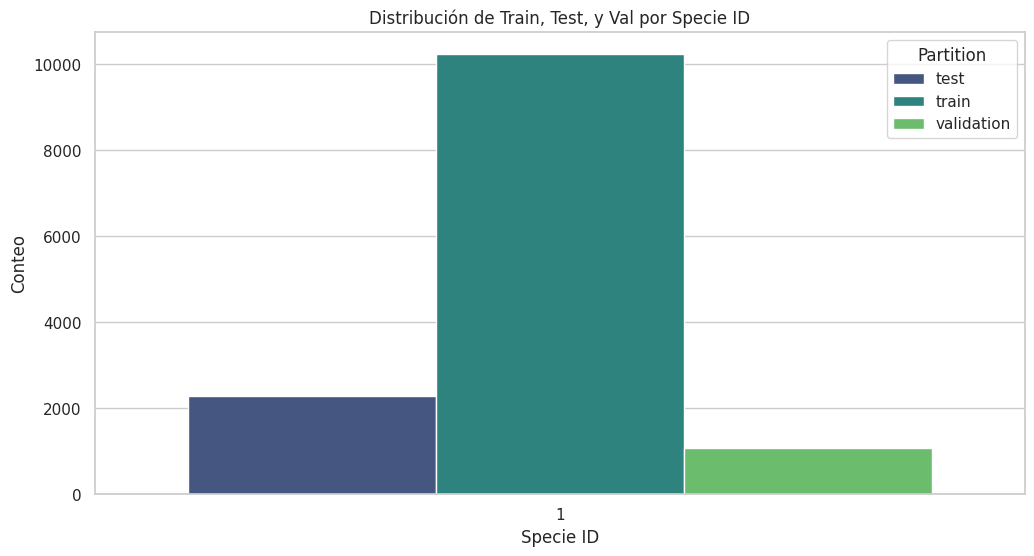

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apilado
plt.figure(figsize=(12, 6))
sns.barplot(x='ID', y='conteo', hue='Partition', data=conteo_splitdata, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Train, Test, y Val por Specie ID')
plt.xlabel('Specie ID')
plt.ylabel('Conteo')

# Mostrar la gráfica
plt.show()


### ANÁLISIS INDIVIDUAL DE FRAMES PARA LA ESPECIE 1 (ARDILLAS SCIURIDAE)

In [14]:
import pandas as pd

# Cargar el archivo Excel
archivo_excel = '/home/emontenegrob/dataset_frames_conf/dataset_frames_2_2.xlsx'
df2 = pd.read_excel(archivo_excel)

df2.head()

,Path del Video,Frame (imagen luego del algoritmo de detección de movimiento),ID,Especie,Tipo,sha256 (del video),sha256 de la imagen,Partition,Bounding Box,Confianza
0,/home/emontenegrob/nov-20/tarjeta 6/11160008.AVI,/home/emontenegrob/frames_pilot_2_2/frames_tra...,2,ARDILLAS SCIURIDAE,mamífero,333d5e14847822e4a1d13d03113da8a3d981760294cb0e...,1d3f22b6a50d38e67e31e282df96432d279bb7a37d575f...,train,"(516, 247, 547, 327)",0.534655
1,/home/emontenegrob/nov-20/tarjeta 6/11160008.AVI,/home/emontenegrob/frames_pilot_2_2/frames_tra...,2,ARDILLAS SCIURIDAE,mamífero,333d5e14847822e4a1d13d03113da8a3d981760294cb0e...,51a711d9c5a586d26e607b68645c34974cc5419c9a69b0...,train,"(519, 248, 563, 335)",0.508792
2,/home/emontenegrob/nov-20/tarjeta 6/11160008.AVI,/home/emontenegrob/frames_pilot_2_2/frames_tra...,2,ARDILLAS SCIURIDAE,mamífero,333d5e14847822e4a1d13d03113da8a3d981760294cb0e...,f6491cf52bf89fa2a5041d9e6e68adfa85948fe33b99ff...,train,"(515, 247, 565, 334)",0.507152
3,/home/emontenegrob/nov-20/tarjeta 6/11160008.AVI,/home/emontenegrob/frames_pilot_2_2/frames_tra...,2,ARDILLAS SCIURIDAE,mamífero,333d5e14847822e4a1d13d03113da8a3d981760294cb0e...,3a5dd43409217084181a786a2eb43c6fdb1f2fa19c36ab...,train,"(516, 247, 564, 335)",0.580226
4,/home/emontenegrob/nov-20/Sendero A Noviembr...,/home/emontenegrob/frames_pilot_2_2/frames_val...,2,ARDILLAS SCIURIDAE,mamífero,c8035670d5a2096262c0f6cfb8c739bc11258210a5ac57...,98ad6151535b659d9499c925e8a52588d7e3dcf56b73c5...,validation,"(448, 494, 547, 589)",0.696253


In [16]:
from tabulate import tabulate

# Agrupar los datos por specie_id y splitdata_pilot
conteo_splitdata = df2.groupby(['ID', 'Partition']).size().reset_index(name='conteo')

# Mostrar los primeros resultados para verificar
print(tabulate(conteo_splitdata.head(18), headers='keys', tablefmt='psql'))

+----+------+-------------+----------+
|    |   ID | Partition   |   conteo |
|----+------+-------------+----------|
|  0 |    2 | test        |      451 |
|  1 |    2 | train       |     2200 |
|  2 |    2 | validation  |      327 |
+----+------+-------------+----------+


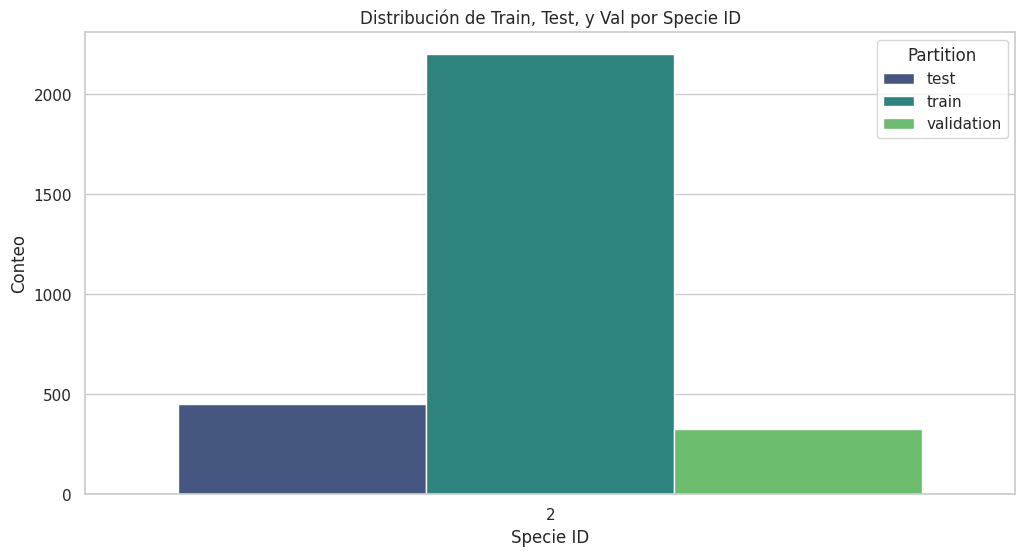

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apilado
plt.figure(figsize=(12, 6))
sns.barplot(x='ID', y='conteo', hue='Partition', data=conteo_splitdata, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Train, Test, y Val por Specie ID')
plt.xlabel('Specie ID')
plt.ylabel('Conteo')

# Mostrar la gráfica
plt.show()



### ANÁLISIS INDIVIDUAL  DE FRAMES PARA LA ESPECIE 2 (ARMADILLO DE NUEVE BANDAS, Nine-banded Armadillo - Dasypus novemcinctus)

In [18]:
import pandas as pd

# Cargar el archivo Excel
archivo_excel = '/home/emontenegrob/dataset_frames_conf/dataset_frames_3_3.xlsx'
df3 = pd.read_excel(archivo_excel)

df3.head()

,Path del Video,Frame (imagen luego del algoritmo de detección de movimiento),ID,Especie,Tipo,sha256 (del video),sha256 de la imagen,Partition,Bounding Box,Confianza
0,/home/emontenegrob/ene-21/tarjeta 13 cedeño/02...,/home/emontenegrob/frames_pilot_3_3/frames_tra...,3,"ARMADILLO DE NUEVE BANDAS, Nine-banded Armadil...",mamífero,e1c9d75ac1ca7de6e2507b7af8f5b0567394403586db85...,943c17ece1111afda424c55215c2be8054908cebae2ee2...,train,"(577, 365, 1133, 663)",0.671041
1,/home/emontenegrob/ene-21/tarjeta 13 cedeño/02...,/home/emontenegrob/frames_pilot_3_3/frames_tra...,3,"ARMADILLO DE NUEVE BANDAS, Nine-banded Armadil...",mamífero,e1c9d75ac1ca7de6e2507b7af8f5b0567394403586db85...,928e2205bd4497c2f4f9cd0c8e5aa172383b4c1f8095f2...,train,"(658, 362, 1098, 618)",0.604442
2,/home/emontenegrob/ene-21/tarjeta 13 cedeño/02...,/home/emontenegrob/frames_pilot_3_3/frames_tra...,3,"ARMADILLO DE NUEVE BANDAS, Nine-banded Armadil...",mamífero,e1c9d75ac1ca7de6e2507b7af8f5b0567394403586db85...,5e373d3f7f00f5897ad1d4057a4dc21753ad5829ef04dc...,train,"(643, 361, 1101, 623)",0.593704
3,/home/emontenegrob/ene-21/tarjeta 13 cedeño/02...,/home/emontenegrob/frames_pilot_3_3/frames_tra...,3,"ARMADILLO DE NUEVE BANDAS, Nine-banded Armadil...",mamífero,e1c9d75ac1ca7de6e2507b7af8f5b0567394403586db85...,bf39dc47be047208f4c76a857bdd73fe214bb5daf680e7...,train,"(633, 347, 1171, 636)",0.558385
4,/home/emontenegrob/ene-21/tarjeta 13 cedeño/02...,/home/emontenegrob/frames_pilot_3_3/frames_tra...,3,"ARMADILLO DE NUEVE BANDAS, Nine-banded Armadil...",mamífero,e1c9d75ac1ca7de6e2507b7af8f5b0567394403586db85...,205d472f5ddd1261cdcc86d6176b0e7e43f8398757e070...,train,"(628, 342, 1251, 671)",0.879595


In [19]:
from tabulate import tabulate

# Agrupar los datos por specie_id y splitdata_pilot
conteo_splitdata = df3.groupby(['ID', 'Partition']).size().reset_index(name='conteo')

# Mostrar los primeros resultados para verificar
print(tabulate(conteo_splitdata.head(18), headers='keys', tablefmt='psql'))

+----+------+-------------+----------+
|    |   ID | Partition   |   conteo |
|----+------+-------------+----------|
|  0 |    3 | test        |      509 |
|  1 |    3 | train       |     4800 |
|  2 |    3 | validation  |      970 |
+----+------+-------------+----------+


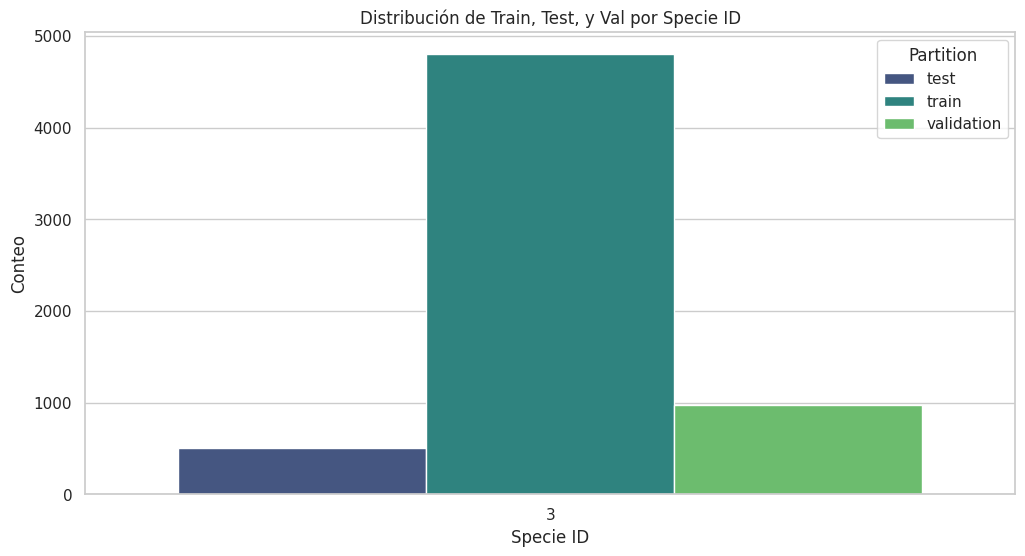

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apilado
plt.figure(figsize=(12, 6))
sns.barplot(x='ID', y='conteo', hue='Partition', data=conteo_splitdata, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Train, Test, y Val por Specie ID')
plt.xlabel('Specie ID')
plt.ylabel('Conteo')

# Mostrar la gráfica
plt.show()


### ANÁLISIS INDIVIDUAL DE FRAMES PARA LA ESPECIE 3 (PACA DE TIERRAS BAJAS, Lowland Paca - Cuniculus paca)

In [21]:
import pandas as pd

# Cargar el archivo Excel
archivo_excel = '/home/emontenegrob/dataset_frames_conf/dataset_frames_4_4.xlsx'
df4 = pd.read_excel(archivo_excel)

df4.head()


,Path del Video,Frame (imagen luego del algoritmo de detección de movimiento),ID,Especie,Tipo,sha256 (del video),sha256 de la imagen,Partition,Bounding Box,Confianza
0,/home/emontenegrob/dic-20/tarjeta 10/01040076.AVI,/home/emontenegrob/frames_pilot_4_4/frames_tra...,4,"PACA DE TIERRAS BAJAS, Lowland Paca - Cunicul...",mamífero,1dffc009eec7d84b49ba3da346adf0fc3adfa56f79d087...,db56ad84ad1a7ec71b2ab6e4337e24c2fa55d77d85977f...,train,"(365, 1, 907, 458)",0.666151
1,/home/emontenegrob/dic-20/tarjeta 10/01040076.AVI,/home/emontenegrob/frames_pilot_4_4/frames_tra...,4,"PACA DE TIERRAS BAJAS, Lowland Paca - Cunicul...",mamífero,1dffc009eec7d84b49ba3da346adf0fc3adfa56f79d087...,067f94b4e36956c2a09d03a26cd9fc6ee31e644341b1d3...,train,"(10, 254, 702, 670)",0.614529
2,/home/emontenegrob/dic-20/tarjeta 10/01040076.AVI,/home/emontenegrob/frames_pilot_4_4/frames_tra...,4,"PACA DE TIERRAS BAJAS, Lowland Paca - Cunicul...",mamífero,1dffc009eec7d84b49ba3da346adf0fc3adfa56f79d087...,5c4c849c945995c87a6c08eefc548e829da4020f872240...,train,"(6, 246, 697, 670)",0.793262
3,/home/emontenegrob/dic-20/tarjeta 10/01040076.AVI,/home/emontenegrob/frames_pilot_4_4/frames_tra...,4,"PACA DE TIERRAS BAJAS, Lowland Paca - Cunicul...",mamífero,1dffc009eec7d84b49ba3da346adf0fc3adfa56f79d087...,1d5f601999a5ff7b1d732314102164876ea64480bdc6a9...,train,"(0, 236, 687, 668)",0.539581
4,/home/emontenegrob/dic-20/tarjeta 10/01040076.AVI,/home/emontenegrob/frames_pilot_4_4/frames_tra...,4,"PACA DE TIERRAS BAJAS, Lowland Paca - Cunicul...",mamífero,1dffc009eec7d84b49ba3da346adf0fc3adfa56f79d087...,1f3fcb599cd27af646af698857169596568aea8ac55464...,train,"(1, 223, 644, 669)",0.392893


In [22]:
# Agrupar los datos por specie_id y splitdata_pilot
conteo_splitdata = df4.groupby(['ID', 'Partition']).size().reset_index(name='conteo')

# Mostrar los primeros resultados para verificar
print(tabulate(conteo_splitdata.head(18), headers='keys', tablefmt='psql'))


+----+------+-------------+----------+
|    |   ID | Partition   |   conteo |
|----+------+-------------+----------|
|  0 |    4 | test        |      129 |
|  1 |    4 | train       |     1690 |
|  2 |    4 | validation  |      419 |
+----+------+-------------+----------+


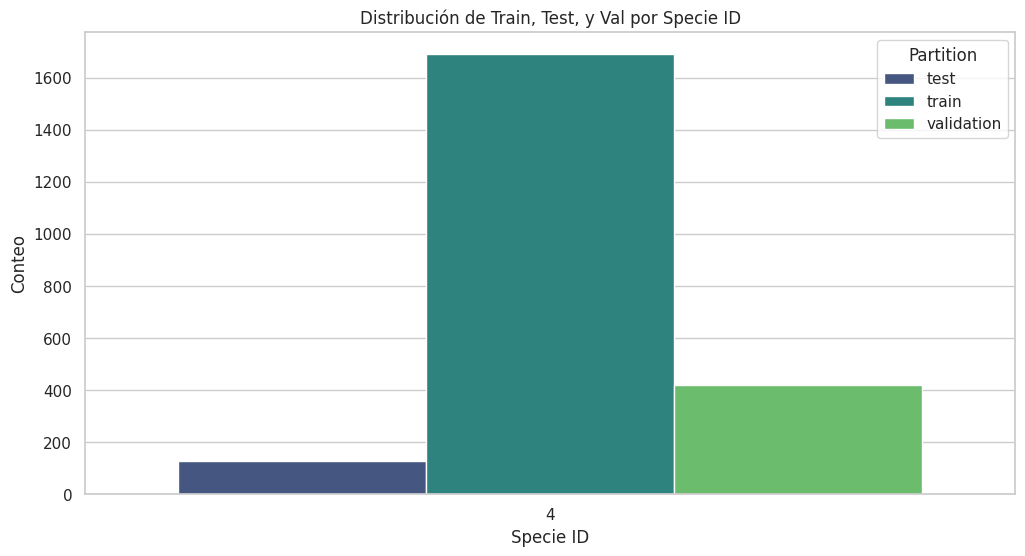

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apilado
plt.figure(figsize=(12, 6))
sns.barplot(x='ID', y='conteo', hue='Partition', data=conteo_splitdata, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Train, Test, y Val por Specie ID')
plt.xlabel('Specie ID')
plt.ylabel('Conteo')

# Mostrar la gráfica
plt.show()



### ANÁLISIS INDIVIDUAL DE FRAMES PARA LA ESPECIE 4 (ROEDOR)

In [24]:
import pandas as pd

# Cargar el archivo Excel
archivo_excel = '/home/emontenegrob/dataset_frames_conf/dataset_frames_5_5.xlsx'
df5 = pd.read_excel(archivo_excel)

df5.head()


,Path del Video,Frame (imagen luego del algoritmo de detección de movimiento),ID,Especie,Tipo,sha256 (del video),sha256 de la imagen,Partition,Bounding Box,Confianza
0,/home/emontenegrob/feb-21/febrero tesoro escon...,/home/emontenegrob/frames_pilot_5_5/frames_tra...,5,ROEDOR,mamífero,b789851b50b7a7fe8446d111f0ab7b1efeae85999e9eb9...,334b6ceaf5ce2407093c72246842b9e53674b459ef9eb1...,train,"(764, 320, 895, 394)",0.558901
1,/home/emontenegrob/feb-21/febrero tesoro escon...,/home/emontenegrob/frames_pilot_5_5/frames_tra...,5,ROEDOR,mamífero,b789851b50b7a7fe8446d111f0ab7b1efeae85999e9eb9...,b0534e098d198924dec3ce6e7b93fc0d6ce7abae53ee5a...,train,"(783, 243, 915, 400)",0.672133
2,/home/emontenegrob/feb-21/febrero tesoro escon...,/home/emontenegrob/frames_pilot_5_5/frames_tra...,5,ROEDOR,mamífero,b789851b50b7a7fe8446d111f0ab7b1efeae85999e9eb9...,54bb06f00b97c5f5eac6691d36e4050a8d94b164d80cfa...,train,"(767, 257, 937, 400)",0.847474
3,/home/emontenegrob/feb-21/febrero tesoro escon...,/home/emontenegrob/frames_pilot_5_5/frames_tra...,5,ROEDOR,mamífero,b789851b50b7a7fe8446d111f0ab7b1efeae85999e9eb9...,298d46fea9c6daf1b531f0e6deffe814c768f15478e1aa...,train,"(751, 265, 961, 393)",0.895322
4,/home/emontenegrob/feb-21/febrero tesoro escon...,/home/emontenegrob/frames_pilot_5_5/frames_tra...,5,ROEDOR,mamífero,b789851b50b7a7fe8446d111f0ab7b1efeae85999e9eb9...,d78d0116dc2b6a2324d6beb92e80cb285543ec9682bcff...,train,"(770, 244, 982, 349)",0.854598


In [25]:
from tabulate import tabulate

# Agrupar los datos por specie_id y splitdata_pilot
conteo_splitdata = df5.groupby(['ID', 'Partition']).size().reset_index(name='conteo')

# Mostrar los primeros resultados para verificar
print(tabulate(conteo_splitdata.head(18), headers='keys', tablefmt='psql'))

+----+------+-------------+----------+
|    |   ID | Partition   |   conteo |
|----+------+-------------+----------|
|  0 |    5 | test        |      708 |
|  1 |    5 | train       |      586 |
|  2 |    5 | validation  |       86 |
+----+------+-------------+----------+


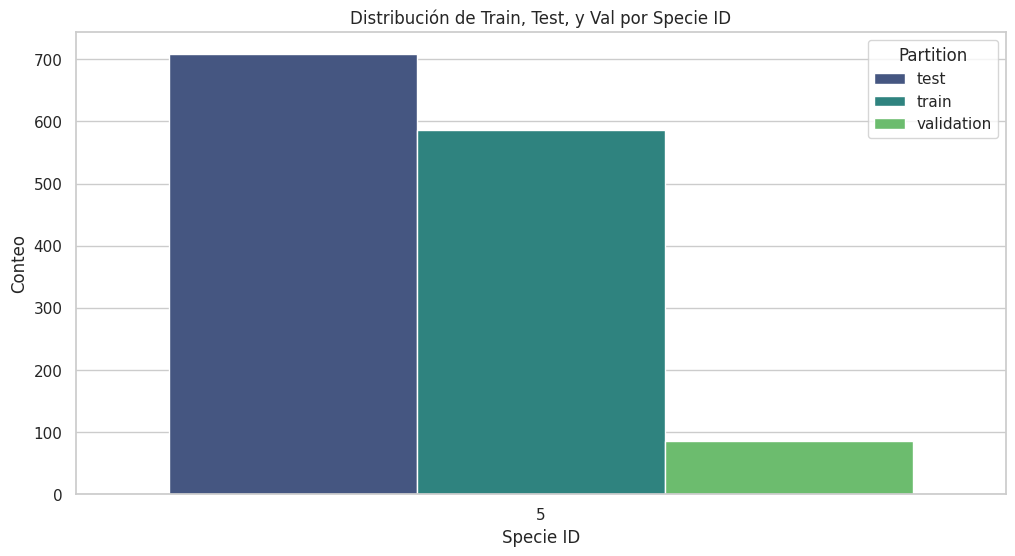

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apilado
plt.figure(figsize=(12, 6))
sns.barplot(x='ID', y='conteo', hue='Partition', data=conteo_splitdata, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Train, Test, y Val por Specie ID')
plt.xlabel('Specie ID')
plt.ylabel('Conteo')

# Mostrar la gráfica
plt.show()


### ANÁLISIS INDIVIDUAL DE FRAMES PARA LA ESPECIE 5 (TINAMU GRANDE, GREAT TINAMOU, Tinamus major)

In [27]:
import pandas as pd

# Cargar el archivo Excel
archivo_excel = '/home/emontenegrob/dataset_frames_conf/dataset_frames_6_6.xlsx'
df6 = pd.read_excel(archivo_excel)

df6.head()


,Path del Video,Frame (imagen luego del algoritmo de detección de movimiento),ID,Especie,Tipo,sha256 (del video),sha256 de la imagen,Partition,Bounding Box,Confianza
0,/home/emontenegrob/sep-oct-21/Tarjeta 13 Sende...,/home/emontenegrob/frames_pilot_6_6/frames_tra...,6,"TINAMU GRANDE, GREAT TINAMOU, Tinamus major.",ave,2a21d30ca793ad7db4edd9bea5537d158cb589914cb4c4...,301103974386c9a0c159645b76ccbba2e26b93924edc02...,train,"(211, 224, 307, 440)",0.853091
1,/home/emontenegrob/sep-oct-21/Tarjeta 13 Sende...,/home/emontenegrob/frames_pilot_6_6/frames_tra...,6,"TINAMU GRANDE, GREAT TINAMOU, Tinamus major.",ave,2a21d30ca793ad7db4edd9bea5537d158cb589914cb4c4...,a61deb285a9d974ba9a5254b8b4204b714929809077ab0...,train,"(215, 216, 310, 440)",0.784244
2,/home/emontenegrob/sep-oct-21/Tarjeta 13 Sende...,/home/emontenegrob/frames_pilot_6_6/frames_tra...,6,"TINAMU GRANDE, GREAT TINAMOU, Tinamus major.",ave,2a21d30ca793ad7db4edd9bea5537d158cb589914cb4c4...,82926eb44dece692bf98e24aaf856693aa4fc61b0e5e62...,train,"(215, 220, 310, 439)",0.779431
3,/home/emontenegrob/sep-oct-21/Tarjeta 13 Sende...,/home/emontenegrob/frames_pilot_6_6/frames_tra...,6,"TINAMU GRANDE, GREAT TINAMOU, Tinamus major.",ave,2a21d30ca793ad7db4edd9bea5537d158cb589914cb4c4...,ca0a5cf9e5c6f48e676c8d00b856c65707d3bd8bb87870...,train,"(217, 206, 313, 453)",0.861465
4,/home/emontenegrob/sep-oct-21/Tarjeta 13 Sende...,/home/emontenegrob/frames_pilot_6_6/frames_tra...,6,"TINAMU GRANDE, GREAT TINAMOU, Tinamus major.",ave,2a21d30ca793ad7db4edd9bea5537d158cb589914cb4c4...,5cd09b53d022a52e05f81c8f39033824d2b50051002355...,train,"(217, 207, 313, 453)",0.859194


In [28]:
from tabulate import tabulate
# Agrupar los datos por specie_id y splitdata_pilot
conteo_splitdata = df6.groupby(['ID', 'Partition']).size().reset_index(name='conteo')

# Mostrar los primeros resultados para verificar
print(tabulate(conteo_splitdata.head(18), headers='keys', tablefmt='psql'))


+----+------+-------------+----------+
|    |   ID | Partition   |   conteo |
|----+------+-------------+----------|
|  0 |    6 | test        |     1938 |
|  1 |    6 | train       |     7955 |
|  2 |    6 | validation  |     1985 |
+----+------+-------------+----------+


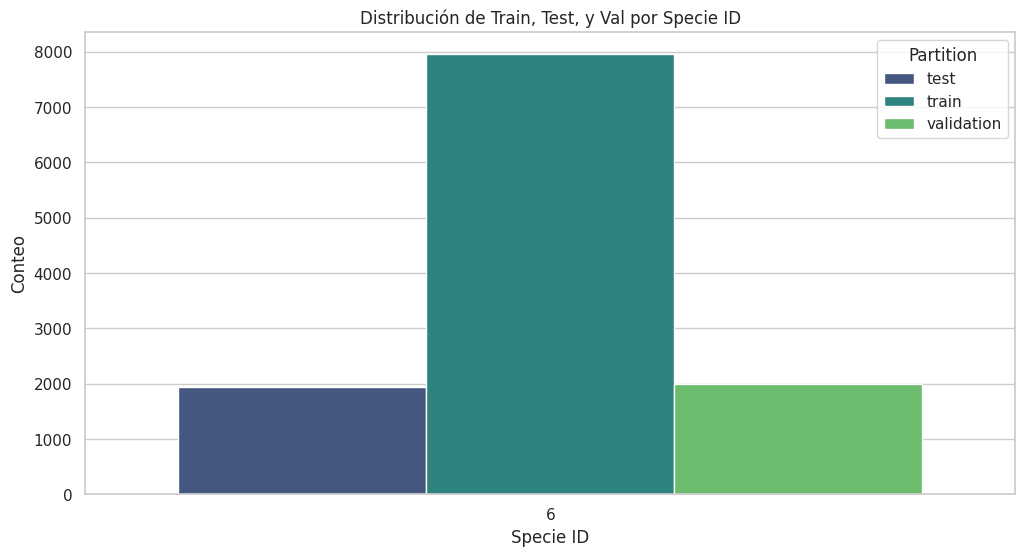

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apilado
plt.figure(figsize=(12, 6))
sns.barplot(x='ID', y='conteo', hue='Partition', data=conteo_splitdata, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Train, Test, y Val por Specie ID')
plt.xlabel('Specie ID')
plt.ylabel('Conteo')

# Mostrar la gráfica
plt.show()


### DISTRIBUCION DE FRAMES POR ESPECIES LUEGO DEL DETECTOR

<ipython-input-7-ba0b6a84b5cb>:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


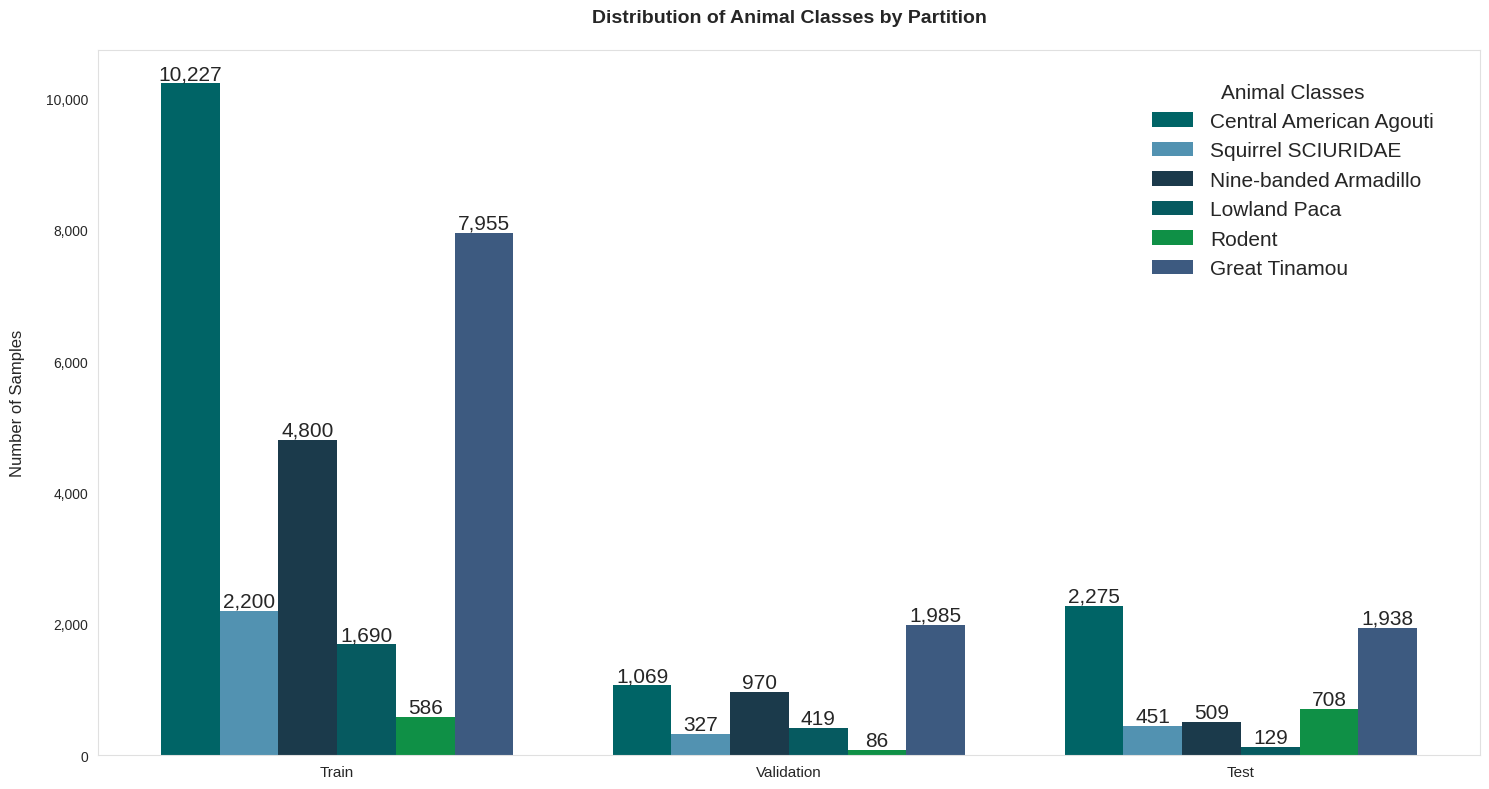

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cargar los datos
df1 = pd.read_excel('/home/emontenegrob/dataset_frames_conf/dataset_frames_1_1.xlsx')
df2 = pd.read_excel('/home/emontenegrob/dataset_frames_conf/dataset_frames_2_2.xlsx')
df3 = pd.read_excel('/home/emontenegrob/dataset_frames_conf/dataset_frames_3_3.xlsx')
df4 = pd.read_excel('/home/emontenegrob/dataset_frames_conf/dataset_frames_4_4.xlsx')
df5 = pd.read_excel('/home/emontenegrob/dataset_frames_conf/dataset_frames_5_5.xlsx')
df6 = pd.read_excel('/home/emontenegrob/dataset_frames_conf/dataset_frames_6_6.xlsx')

# Nueva paleta de colores con mayor contraste
colors = ['#006466',  # verde azulado oscuro
          '#5292b1',  # azul oscuro
          '#1B3A4B',  # azul medio oscuro
          '#065A60',  # verde azulado medio
          '#0f9046',  # verde azulado claro
          '#3D5A80']  # azul grisáceo

# Nombres actualizados de las clases de animales
class_names = ['Central American Agouti', 'Squirrel SCIURIDAE', 'Nine-banded Armadillo',
               'Lowland Paca', 'Rodent', 'Great Tinamou']
datasets = [df1, df2, df3, df4, df5, df6]
partitions = ['Train', 'Validation', 'Test']

# Configurar el estilo
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(15, 8))

# Establecer fondo transparente
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Configurar las posiciones de las barras
x = np.arange(len(partitions))
width = 0.13

# Crear barras para cada clase de animal
for i, (df, color, class_name) in enumerate(zip(datasets, colors, class_names)):
    counts = [len(df[df['Partition'].str.lower() == p.lower()]) for p in partitions]
    bars = ax.bar(x + width * (i - len(datasets)/2 + 0.5), counts, width,
                  label=class_name, color=color)
    
    # Añadir etiquetas de valores encima de cada barra
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', rotation=0,
                fontsize=15)

# Personalizar el gráfico
ax.set_ylabel('Number of Samples', fontsize=12, labelpad=15)
ax.set_title('Distribution of Animal Classes by Partition', 
             pad=20, fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(partitions, fontsize=11)
ax.tick_params(axis='y', labelsize=10)

# Formatear los números del eje y con separadores de miles
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Personalizar la leyenda y colocarla dentro del gráfico
ax.legend(title='Animal Classes', 
         title_fontsize=15,
         fontsize=15,
         loc='upper right',
         bbox_to_anchor=(0.98, 0.98))

# Configurar grid completo
ax.grid(True, linestyle='--')
ax.set_axisbelow(True)  # Poner el grid detrás de las barras

# Añadir un borde sutil al área del gráfico
for spine in ax.spines.values():
    spine.set_edgecolor('#e0e0e0')
    spine.set_linewidth(0.8)

# Ajustar los márgenes
plt.tight_layout()

# Guardar la figura con alta resolución
plt.savefig('distribucion_animales.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### ID DE CADA ESPECIE

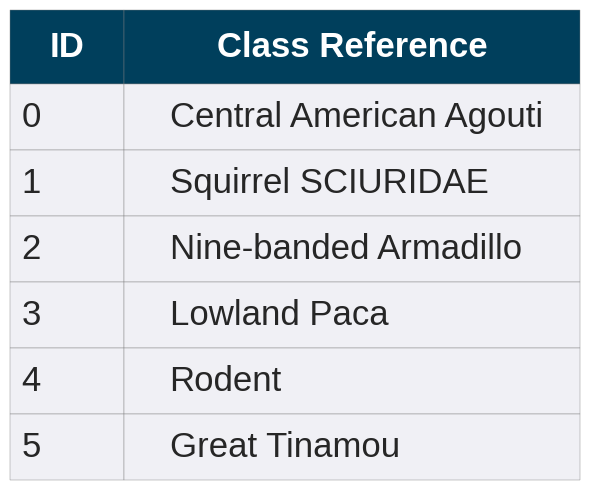

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Crear figura
fig, ax = plt.subplots(figsize=(6,5))

# Ocultar los ejes
ax.axis('off')

# Datos para la tabla con encabezados
column_headers = ['ID', 'Class Reference']
data = [
    ['0', 'Central American Agouti'],
    ['1', 'Squirrel SCIURIDAE'],
    ['2', 'Nine-banded Armadillo'],
    ['3', 'Lowland Paca'],
    ['4', 'Rodent'],
    ['5', 'Great Tinamou']
]

# Crear tabla
table = ax.table(
    cellText=data,
    colLabels=column_headers,
    loc='center',
    cellLoc='left',
    colWidths=[0.2, 0.8],
    bbox=[0, 0, 1, 1]
)

# Personalizar el aspecto de la tabla
table.auto_set_font_size(False)
table.set_fontsize(25)

# Ajustar el estilo de las celdas
for pos, cell in table._cells.items():
    cell.set_height(0.16)
    cell.set_facecolor('#f0f0f5')
    cell.set_edgecolor('gray')
    cell.PAD = 0.1
    
    # Dar formato especial a las celdas del encabezado
    if pos[0] == 0:  # Si es una celda del encabezado
        cell.set_facecolor('#003f5c')  # Color más oscuro para el encabezado
        cell.set_text_props(color='white', weight='bold')
        cell.set_height(0.18)  # Hacer el encabezado un poco más alto

# Ajustar el layout
plt.tight_layout()

# Mostrar la figura
plt.show()